In [38]:
import os
import numpy as np 
import pandas as pd  
import requests
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
nltk.download('wordnet')
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [47]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [48]:

data=pd.read_csv('Books_Dataset.csv',na_values='NULL')
data.shape

(7797, 8)

In [49]:
data.head(5)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts"
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery"
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography"


In [50]:
data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

In [51]:

for col in data.columns:
    print('The Number of Unique {:^2s} are {:^2d}: '.format(col,data[col].value_counts().shape[0]))
    print()

The Number of Unique Title are 6787: 

The Number of Unique Author are 4372: 

The Number of Unique Edition are 3882: 

The Number of Unique Reviews are 36: 

The Number of Unique Ratings are 368: 

The Number of Unique Synopsis are 6771: 

The Number of Unique Genre are 363: 

The Number of Unique BookCategory are 11: 



In [52]:
print(data.Title.duplicated().sum())

1010


In [53]:
data.drop_duplicates('Title',keep='first',inplace=True)
data.shape

(6787, 8)

In [54]:
print(data.Synopsis.duplicated().sum())

68


In [55]:
data.drop_duplicates('Synopsis',keep='first',inplace=True)
data.shape

(6719, 8)

In [77]:
data_copy=data.copy()

In [56]:
data=data.drop(['Author','Edition','Reviews','Ratings'],axis=1)
data.head(5)

,Title,Synopsis,Genre,BookCategory
0,The Prisoner's Gold (The Hunters 3),THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure
1,Guru Dutt: A Tragedy in Three Acts,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts"
2,Leviathan (Penguin Classics),"""During the time men live without a common Pow...",International Relations,Humour
3,A Pocket Full of Rye (Miss Marple),A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery"
4,LIFE 70 Years of Extraordinary Photography,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography"


In [57]:
print('Number of Unique Genre in data is {:^2d}'.format(data.Genre.value_counts().shape[0]))

Number of Unique Genre in data is 363


Number of Unique Book Category in data is 11


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

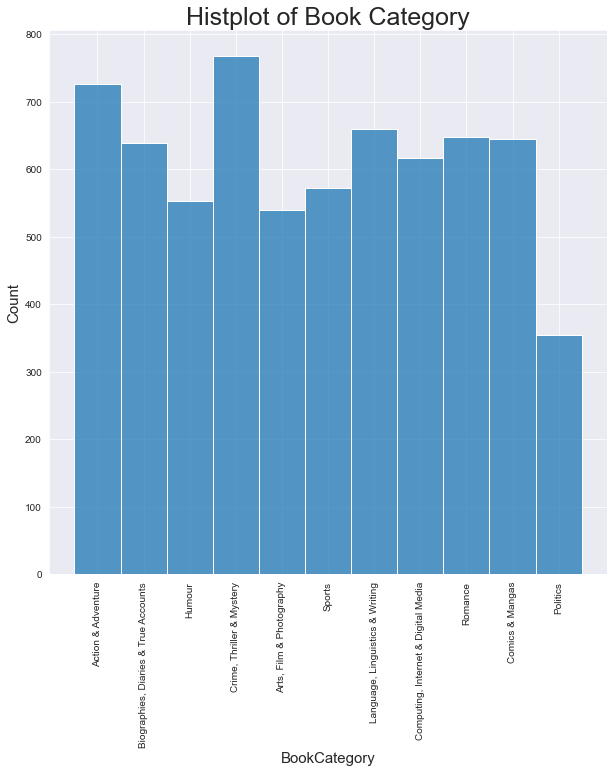

In [58]:
print('Number of Unique Book Category in data is {:^2d}'.format(data.BookCategory.value_counts().shape[0]))
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.histplot(data.BookCategory,bins=data.BookCategory.value_counts().shape[0])
plt.title('Histplot of Book Category',size=25)
plt.xlabel('BookCategory',size=15)
plt.ylabel('Count',size=15)
plt.xticks(rotation=90)

In [59]:
#Dummies
data_dummy=pd.get_dummies(data[data.columns[-2:]],drop_first=True)
data_dummy.head(5)
print('Dummy Shape: ',data_dummy.shape)

Dummy Shape:  (6719, 372)


In [60]:
title=data.Title.values
title[:2]

array(["The Prisoner's Gold (The Hunters 3)",
       'Guru Dutt: A Tragedy in Three Acts'], dtype=object)

In [61]:
title=[x.lower() for x in title]
title
# Cleaning Synopsis Text
title=[re.sub(r'\n','',y) for y in title] # Replacing removing new line characters
title=[re.sub(r'\\','',y) for y in title]
title=[re.sub(r'[^\-\w+]',' ',y) for y in title] # Removes Characters except '
title=[re.split(r'[^a-zA-Z]+',y) for y in title]
title[:2]

[['the', 'prisoner', 's', 'gold', 'the', 'hunters', ''],
 ['guru', 'dutt', 'a', 'tragedy', 'in', 'three', 'acts']]

In [62]:
#Loading Stopwords
stopword_github='https://raw.githubusercontent.com/Josh2297/stopwords/master/Stop_words.txt'
github_link=requests.get(stopword_github)
github_link.status_code

200

In [63]:
stop_words=github_link.text
stop_words=re.sub(r'\r|\n|\r\n',' ',stop_words) # Strip Newlines and Tabs
stop_words=re.findall(r'\S+',stop_words) # Find only words
stop_words[:]

['#',
 "'ll",
 "'ve",
 'Freely',
 'From',
 'I',
 'a',
 "a's",
 'able',
 'about',
 'above',
 'abroad',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'adopted',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ago',
 'ah',
 'ahead',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'alongside',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amid',
 'amidst',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'apparently',
 'appear',
 'appreciate',
 'appropriate',
 'approximately',
 'are',
 'area',
 'areas',
 'aren',
 "aren't",
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asked',
 'asking',
 'asks',
 'associated',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'backw

In [64]:
#Remove Stopwords From Title Texts
title=[list(set(x)-set(stop_words)) for x in title]
title=[[x for x in y if len(x)>2] for y in title]
title=[[x for x in y if x!='']for y in title]
title[:2]

[['hunters', 'prisoner', 'gold'], ['guru', 'acts', 'tragedy', 'dutt']]

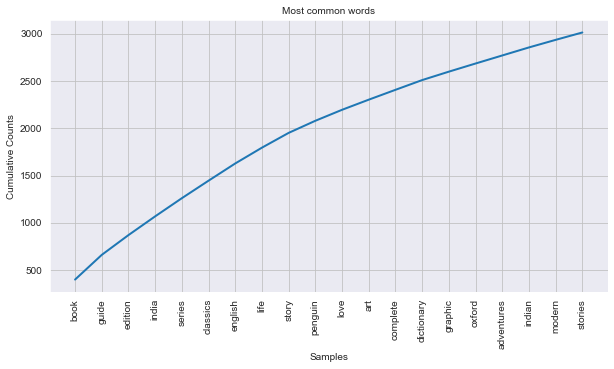

<AxesSubplot:title={'center':'Most common words'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [65]:
words=[x for y in title for x in y]
len(words)
plt.figure(figsize=(10,5))
plt.title('Most common words',size=10)
fd=nltk.FreqDist(words)
nltk.FreqDist.plot(fd,20,cumulative=True) 


In [66]:
#Lemmatizer from nltk
wl=WordNetLemmatizer()
title=[[wl.lemmatize(x) for x in y] for y in title]
title[:]

[['hunter', 'prisoner', 'gold'],
 ['guru', 'act', 'tragedy', 'dutt'],
 ['classic', 'leviathan', 'penguin'],
 ['pocket', 'rye', 'marple'],
 ['photography', 'extraordinary', 'life'],
 ['chirunning',
  'injury',
  'revolutionary',
  'effortless',
  'free',
  'approach',
  'running'],
 ['poirot', 'death', 'nile'],
 ['companion',
  'meditation',
  'vedanta',
  'practice',
  'centre',
  'sivananda',
  'guide',
  'exercise',
  'complete',
  'recipe',
  'programme',
  'yoga',
  'lifestyle',
  'nourishing'],
 ['sreedharan', 'karmayogi', 'biography'],
 ['accursed', 'book', 'iron', 'king', 'king'],
 ['oppressive',
  'liberating',
  'political',
  'battle',
  'sacred',
  'sanskrit',
  'dead',
  'alive'],
 ['bitcoin',
  'technology',
  'changing',
  'revolution',
  'cryptocurrencies',
  'blockchain'],
 ['pan', 'asian', 'saga', 'tai'],
 ['martial',
  'defense',
  'tuttle',
  'art',
  'health',
  'kung',
  'shaolin',
  'art',
  'enlightenment',
  'secret'],
 ['ghost', 'anil'],
 ['origin', 'comic', 's

In [67]:
#combine
title=[' '.join(x) for x in title]
title[:2]

['hunter prisoner gold', 'guru act tragedy dutt']

In [68]:
cv=CountVectorizer()
title=cv.fit_transform(title)
title.shape

(6719, 6991)

In [71]:
data_mat=np.append(title.toarray(),data_dummy.values,axis=1) # Merging Data
data_mat[:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
#Recommendation

In [78]:
def Selected_Book(index):
    print(data_copy.iloc[index])
    print()

In [83]:
def Recommend_Book(index,num_of_books):
    Selected_Book(index=index) 
    item_similarity=(1-cosine_similarity(data_mat[index:index+1],data_mat))  
    item_arg=item_similarity.argsort()  
    for x in range(1,num_of_books+1):
        print('Cosine Similarity: {:.3f}'.format(item_similarity[:,x][0])) 
        Selected_Book(item_arg.reshape(-1,1).flatten()[x])


In [87]:
Recommend_Book(1345,5)

Title           2018 FIFA World Cup Russia (TM) The Official B...
Synopsis        The 2018 FIFA World Cup Russia (TM) The Offici...
Genre                     Sporting Events & Organisations (Books)
BookCategory                                               Sports
Name: 1387, dtype: object

Cosine Similarity: 1.000
Title           ICC Cricket World Cup 2019 England & Wales 201...
Synopsis        Icc cricket world Cup England 2019: The offici...
Genre                     Sporting Events & Organisations (Books)
BookCategory                                               Sports
Name: 6758, dtype: object

Cosine Similarity: 1.000
Title                                The WWE Book of Top 10s (Dk)
Synopsis        From the top 10 Champions to the most popular ...
Genre                     Sporting Events & Organisations (Books)
BookCategory                                               Sports
Name: 2462, dtype: object

Cosine Similarity: 1.000
Title           Sealed With A Six: The Story Of The 